In [5]:
import sys
sys.path.append('../../src/analysis')
sys.path.append('../../src/data_handling')

In [6]:
# --- Sử dụng DataAggregator với các ID pin thực tế ---
from aggregator import DataAggregator

if __name__ == '__main__':
    # <<< !!! THAY ĐỔI ĐƯỜNG DẪN NÀY !!! >>>
    ACTUAL_DATA_DIR = "../../dataset/" # Đường dẫn đến thư mục chứa B0005, B0006,...

    # Danh sách các pin cần xử lý
    actual_battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']

    # Cấu hình FE (tùy chọn, có thể để trống nếu dùng default)
    fe_configuration = {
        #'eol_threshold_percentage': 0.75, # Ví dụ: thay đổi ngưỡng EoL
        # Thêm các config khác nếu hàm FE của bạn hỗ trợ
    }

    # 1. Khởi tạo Aggregator
    print(f"\nInitializing Data Aggregator for: {actual_battery_ids}")
    aggregator_actual = DataAggregator(
        battery_ids=actual_battery_ids,
        data_dir=ACTUAL_DATA_DIR,
        fe_config=fe_configuration
    )

    # 2. Chạy quá trình tổng hợp
    # force_rerun=True sẽ chạy lại FE ngay cả khi đã chạy trước đó
    aggregator_actual.aggregate(force_rerun=True)

    # 3. Lấy và kiểm tra dữ liệu kết hợp
    final_actual_combined_data = aggregator_actual.get_combined_data()

    if final_actual_combined_data is not None:
        print("\n--- Final Combined Actual Data Info ---")
        print(final_actual_combined_data.info()) # Kiểm tra kiểu dữ liệu, non-null
        print("\n--- Final Combined Actual Data Head ---")
        print(final_actual_combined_data.head())
        print("\n--- Final Combined Actual Data Tail ---")
        print(final_actual_combined_data.tail())
        print(f"\nUnique Battery IDs in final data: {final_actual_combined_data['battery_id'].unique()}")
        print(f"Total rows in final data: {len(final_actual_combined_data)}")
        print(f"NaN check final data: {final_actual_combined_data.isnull().sum().sum()} NaNs") # Kiểm tra NaN lần cuối

        # Từ đây, final_actual_combined_data đã sẵn sàng cho các lớp tiếp theo
        # (FeatureAnalyzer, FeatureSelector, CrossValidator...)
    else:
        print("\nData aggregation failed for the actual battery datasets.")


Initializing Data Aggregator for: ['B0005', 'B0006', 'B0007', 'B0018']

--- Starting Data Aggregation for Batteries: ['B0007', 'B0005', 'B0006', 'B0018'] ---


Aggregating Batteries:   0%|          | 0/4 [00:00<?, ?it/s]


--- Processing: B0007 ---
--- Loading data for battery: B0007 ---
  Successfully loaded: capacity_B0007.csv
  Successfully loaded: charge_B0007.csv
  Successfully loaded: discharge_B0007.csv
--- Data loading process completed for B0007 ---
  Ensuring numeric types for B0007...
--- Starting Feature Engineering process for B0007 ---
  Calculating SOH/RUL for B0007...
    Note: Battery B0007 did not reach EoL threshold (1.32 Ah). Using 169 for RUL.
  Engineering discharge features for B0007...


  Engineering charge features for B0007...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/data_handling\feature_engineer.py:270: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill').fillna(method='ffill')
Aggregating Batteries:  25%|██▌       | 1/4 [00:01<00:04,  1.34s/it]

  Merging features for B0007...
  Handling NaNs for B0007...
--- Feature Engineering process finished for B0007 ---
  Successfully processed B0007. Shape: (168, 13)

--- Processing: B0005 ---
--- Loading data for battery: B0005 ---
  Successfully loaded: capacity_B0005.csv
  Successfully loaded: charge_B0005.csv
  Successfully loaded: discharge_B0005.csv
--- Data loading process completed for B0005 ---
  Ensuring numeric types for B0005...
--- Starting Feature Engineering process for B0005 ---
  Calculating SOH/RUL for B0005...
  Engineering discharge features for B0005...


  Engineering charge features for B0005...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/data_handling\feature_engineer.py:270: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill').fillna(method='ffill')
Aggregating Batteries:  50%|█████     | 2/4 [00:02<00:02,  1.33s/it]

  Merging features for B0005...
  Handling NaNs for B0005...
--- Feature Engineering process finished for B0005 ---
  Successfully processed B0005. Shape: (168, 13)

--- Processing: B0006 ---
--- Loading data for battery: B0006 ---
  Successfully loaded: capacity_B0006.csv
  Successfully loaded: charge_B0006.csv
  Successfully loaded: discharge_B0006.csv
--- Data loading process completed for B0006 ---
  Ensuring numeric types for B0006...
--- Starting Feature Engineering process for B0006 ---
  Calculating SOH/RUL for B0006...
  Engineering discharge features for B0006...


  Engineering charge features for B0006...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/data_handling\feature_engineer.py:270: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill').fillna(method='ffill')
Aggregating Batteries:  75%|███████▌  | 3/4 [00:03<00:01,  1.32s/it]

  Merging features for B0006...
  Handling NaNs for B0006...
--- Feature Engineering process finished for B0006 ---
  Successfully processed B0006. Shape: (168, 13)

--- Processing: B0018 ---
--- Loading data for battery: B0018 ---
  Successfully loaded: capacity_B0018.csv
  Successfully loaded: charge_B0018.csv
  Successfully loaded: discharge_B0018.csv
--- Data loading process completed for B0018 ---
  Ensuring numeric types for B0018...
--- Starting Feature Engineering process for B0018 ---
  Calculating SOH/RUL for B0018...
    Note: Battery B0018 did not reach EoL threshold (1.30 Ah). Using 133 for RUL.
  Engineering discharge features for B0018...


  Engineering charge features for B0018...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/data_handling\feature_engineer.py:270: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill').fillna(method='ffill')
Aggregating Batteries: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


  Merging features for B0018...
  Handling NaNs for B0018...
--- Feature Engineering process finished for B0018 ---
  Successfully processed B0018. Shape: (132, 13)

--- Concatenating data from all processed batteries ---
Combined DataFrame shape: (636, 13)
Unique batteries in combined data: ['B0007' 'B0005' 'B0006' 'B0018']

--- Performing final NaN check and fill on combined data ---
No NaNs found in the combined data after individual processing.
--- Data Aggregation Finished ---

--- Final Combined Actual Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               636 non-null    int64  
 1   capacity            636 non-null    float64
 2   SOH                 636 non-null    float64
 3   RUL                 636 non-null    int64  
 4   Discharge_V_median  636 non-null    float64
 5   Discharge_V_skew   

In [7]:
import sys
sys.path.append('../../src/analysis')


--- Example Usage of FeatureAnalyzer ---
Using combined data from previous DataAggregator step.
FeatureAnalyzer initialized with data shape: (636, 13)
Correlation matrix not calculated yet. Calculating with default settings...

Calculating correlation matrix (method='pearson', numeric_only=True)...
  Using 12 numeric columns for correlation.
  Correlation matrix calculated successfully.

Plotting correlation heatmap...


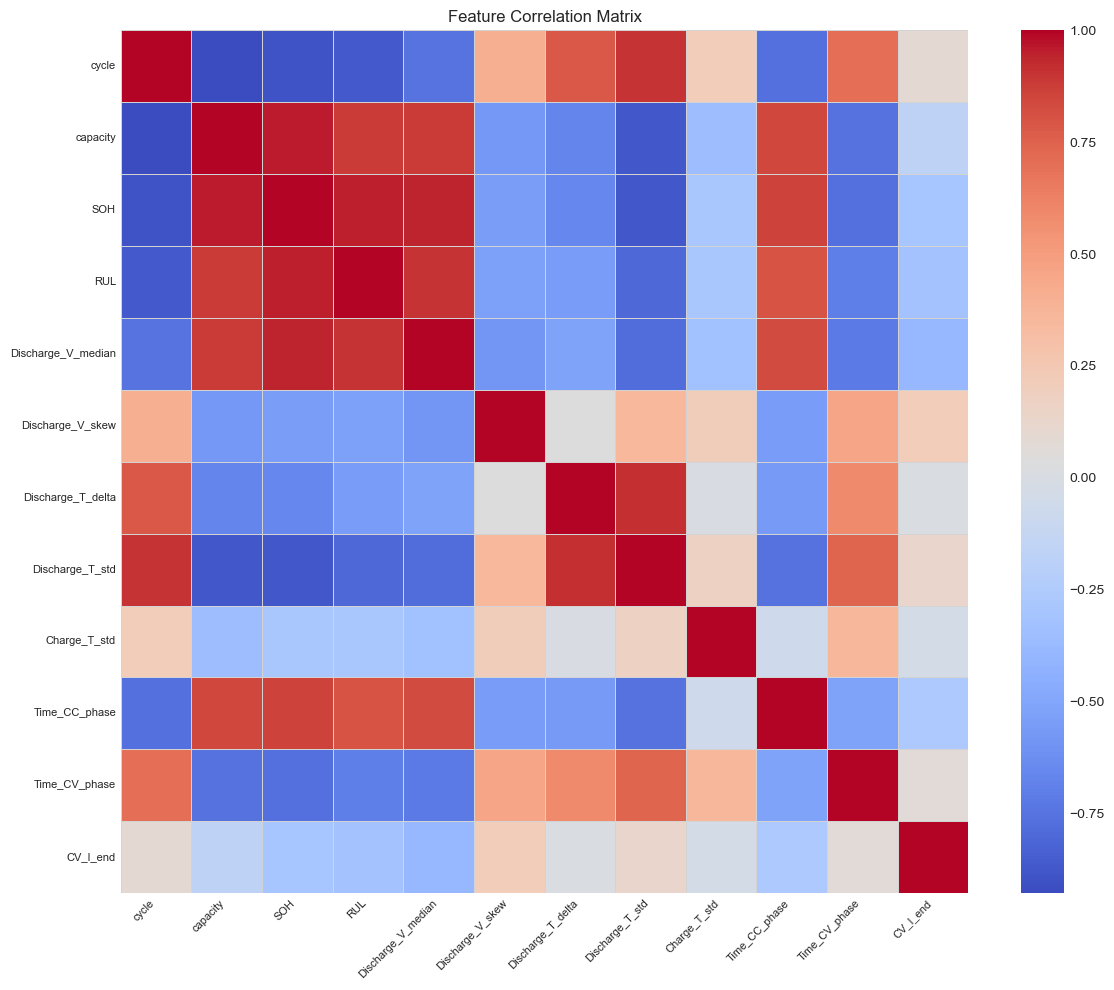


Correlation with SOH:
Top 5 Positive/Negative:
capacity              0.958613
RUL                   0.948663
Discharge_V_median    0.943803
Time_CC_phase         0.856973
Charge_T_std         -0.288075
Name: SOH, dtype: float64
Discharge_V_skew    -0.551892
Discharge_T_delta   -0.659147
Time_CV_phase       -0.763732
Discharge_T_std     -0.877038
cycle               -0.894295
Name: SOH, dtype: float64

Plotting correlation with target: 'SOH'...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/analysis\analyzer.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_series_plot.values, y=corr_series_plot.index,


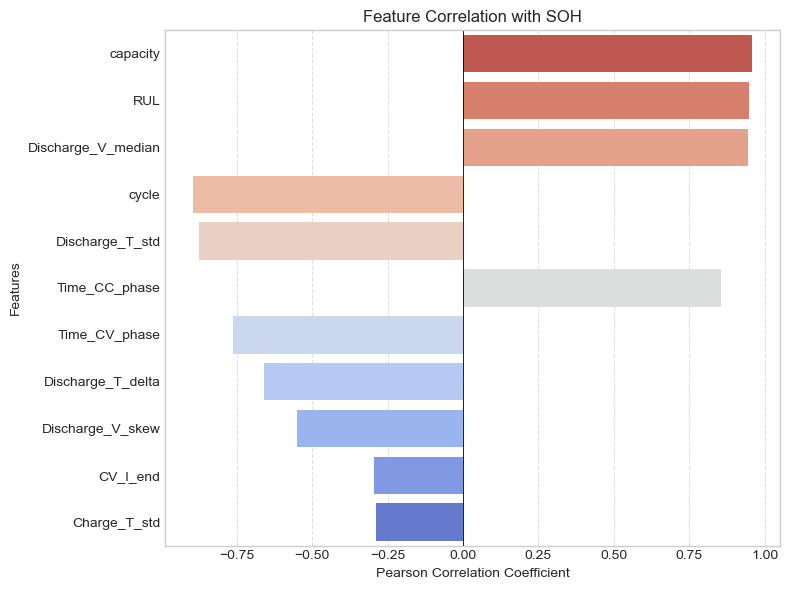


Correlation with RUL:
Top 5 Positive/Negative:
SOH                   0.948663
Discharge_V_median    0.904691
capacity              0.880138
Time_CC_phase         0.802167
Charge_T_std         -0.287682
Name: RUL, dtype: float64
Discharge_V_skew    -0.532074
Discharge_T_delta   -0.559170
Time_CV_phase       -0.696238
Discharge_T_std     -0.802010
cycle               -0.866456
Name: RUL, dtype: float64

Plotting correlation with target: 'RUL'...


e:\Do an tot nghiep\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\analysis\../../src/analysis\analyzer.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_series_plot.values, y=corr_series_plot.index,


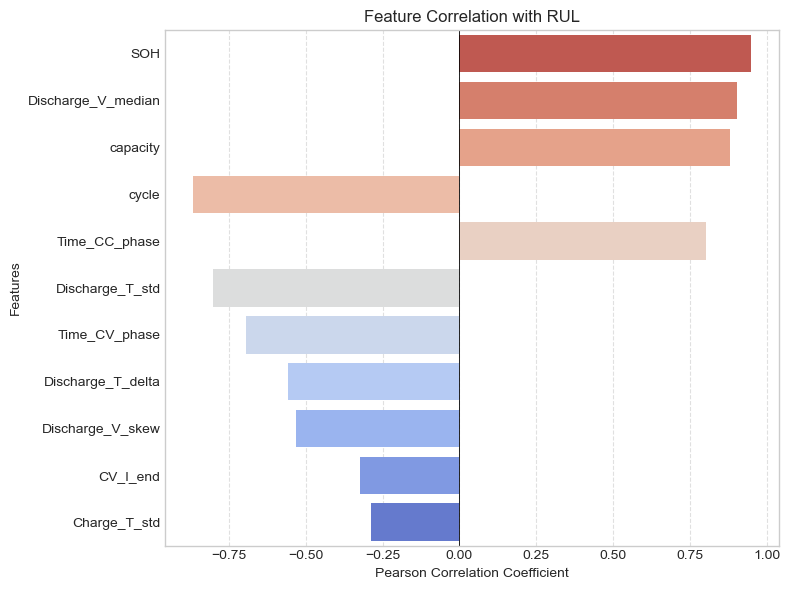

In [8]:
# --- Ví dụ Sử dụng Lớp FeatureAnalyzer ---
from analyzer import FeatureAnalyzer
if __name__ == '__main__':
    # --- Giả sử bạn đã chạy DataAggregator và có final_actual_combined_data ---
    # --- Hoặc tạo dữ liệu giả lập để test lớp này độc lập ---
    print("\n--- Example Usage of FeatureAnalyzer ---")
    try:
        # Kiểm tra xem DataFrame kết hợp từ bước trước có tồn tại không
        if 'final_actual_combined_data' not in locals() or final_actual_combined_data is None:
            print("Combined data not found from previous step. Creating dummy data for FeatureAnalyzer example...")
            # Tạo dữ liệu giả tương tự output của DataAggregator
            dummy_features = ['featureA', 'featureB', 'featureC', 'SOH', 'RUL']
            dummy_data = pd.DataFrame(np.random.rand(100, len(dummy_features)), columns=dummy_features)
            dummy_data['battery_id'] = np.random.choice(['P1', 'P2'], size=100)
            dummy_data['SOH'] = 100 - dummy_data['featureA'] * 10
            dummy_data['RUL'] = 150 - dummy_data['featureB'] * 50 - (100 - dummy_data['SOH']) * 1.5
            dummy_data = dummy_data.clip(lower=0) # Đảm bảo không âm
            input_df_for_analyzer = dummy_data
        else:
            print("Using combined data from previous DataAggregator step.")
            input_df_for_analyzer = final_actual_combined_data

        # 1. Khởi tạo Analyzer
        analyzer = FeatureAnalyzer(combined_data=input_df_for_analyzer)

        # 2. Tính toán và xem ma trận tương quan (không bắt buộc phải gọi riêng nếu gọi get_...)
        # analyzer.calculate_correlation()
        # corr_mat = analyzer.get_correlation_matrix()
        # if corr_mat is not None:
        #     print("\nCorrelation Matrix Head:")
        #     print(corr_mat.head())

        # 3. Vẽ heatmap
        analyzer.plot_correlation_heatmap(figsize=(12,10), annot=False) # Giảm kích thước cho ví dụ

        # 4. Phân tích tương quan với SOH
        soh_correlation = analyzer.get_correlation_with_target('SOH')
        if soh_correlation is not None:
            print("\nCorrelation with SOH:")
            # In ra top 5 và bottom 5 tương quan (loại bỏ chính SOH)
            print("Top 5 Positive/Negative:")
            print(soh_correlation.drop('SOH', errors='ignore').head())
            print(soh_correlation.drop('SOH', errors='ignore').tail())
            analyzer.plot_correlation_with_target('SOH', sort_by_abs=True, figsize=(8,6))

        # 5. Phân tích tương quan với RUL
        rul_correlation = analyzer.get_correlation_with_target('RUL')
        if rul_correlation is not None:
            print("\nCorrelation with RUL:")
            print("Top 5 Positive/Negative:")
            print(rul_correlation.drop('RUL', errors='ignore').head())
            print(rul_correlation.drop('RUL', errors='ignore').tail())
            analyzer.plot_correlation_with_target('RUL', sort_by_abs=True, figsize=(8,6))

    except Exception as e:
        print(f"\nAn error occurred during FeatureAnalyzer example: {e}")
        # raise e # Bỏ comment nếu muốn dừng hẳn khi có lỗi